In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Lambda

In [ ]:
def suma5(x):
  return x + 5

suma5(7)

12

In [ ]:
nuevo_suma5 = lambda x: x+5

nuevo_suma5(7)

12

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [ ]:
link = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'

In [ ]:
df = pd.read_csv(link,
                 parse_dates=['Month'],
                 index_col='Month',
                 date_parser=dateparse)

<ipython-input-14-d9af7dd0e073>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
serie = df['#Passengers']

In [ ]:
serie

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
serie['1960-05']

Month
1960-05-01    472
Name: #Passengers, dtype: int64

In [ ]:
serie[datetime(1950,3,1)]

141

In [ ]:
datetime(1950,3,1)

datetime.datetime(1950, 3, 1, 0, 0)

In [ ]:
serie['1950-03':'1958-02']

Month
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
             ... 
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
1958-02-01    318
Name: #Passengers, Length: 96, dtype: int64

In [ ]:
serie['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
serie.index.min()

Timestamp('1949-01-01 00:00:00')

In [ ]:
serie.index.max()

Timestamp('1960-12-01 00:00:00')

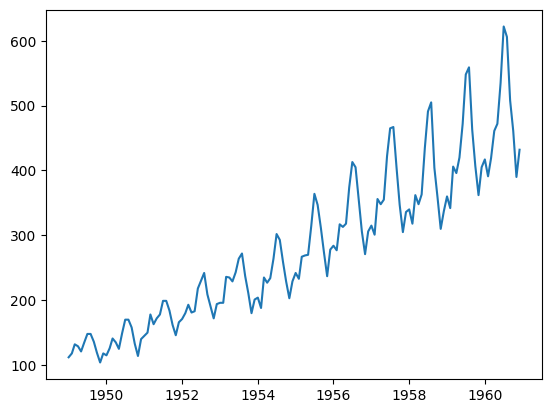

In [ ]:
plt.plot(serie)
plt.show()

In [ ]:
serie_anual = serie.resample('A').sum()

serie_anual

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

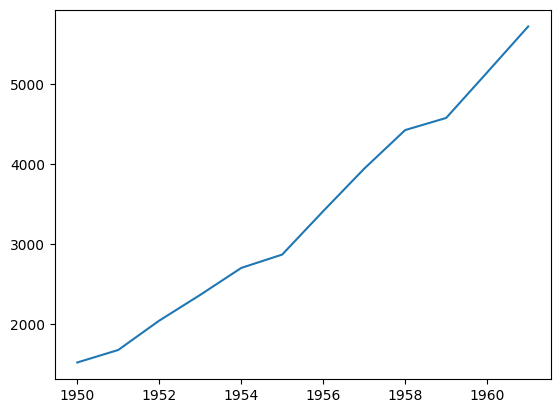

In [ ]:
plt.plot(serie_anual)
plt.show()

In [ ]:
serie_mensual = serie.groupby([lambda x: x.month]).sum()
serie_mensual

Month
1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

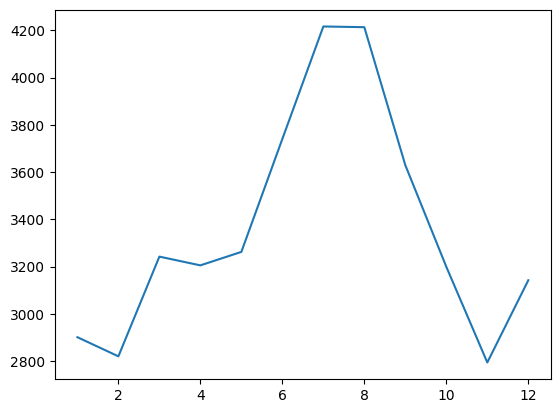

In [ ]:
plt.plot(serie_mensual)
plt.show()

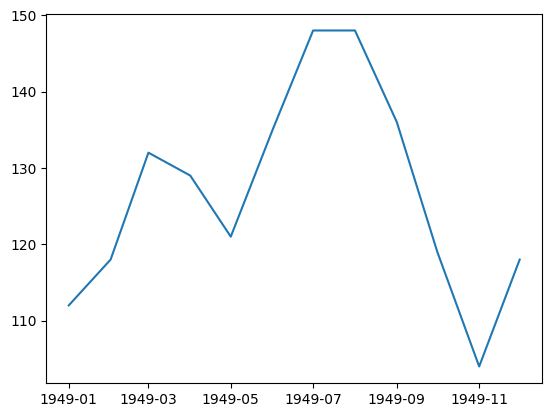

In [ ]:
plt.plot(serie['1949-01':'1949-12'])
plt.show()

In [ ]:
descomposicion = seasonal_decompose(serie)

tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal
ruido = descomposicion.resid

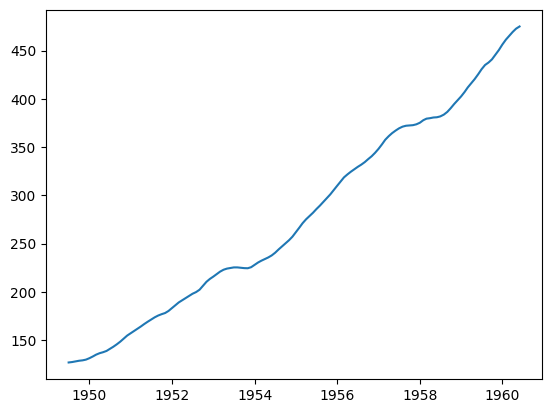

In [ ]:
plt.plot(tendencia)
plt.show()

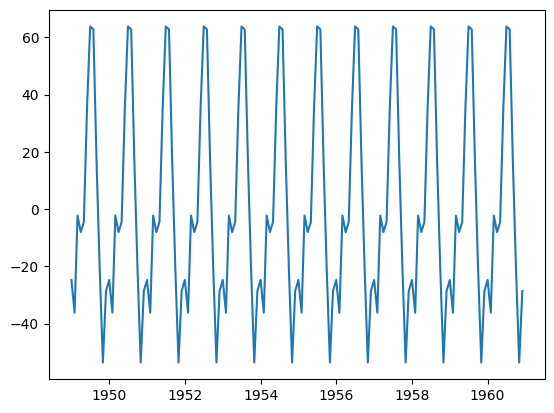

In [ ]:
plt.plot(estacionalidad)
plt.show()

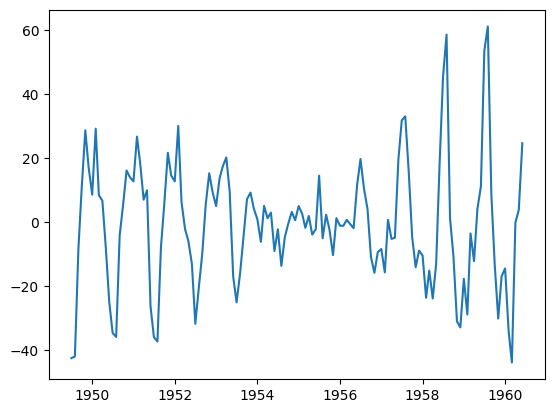

In [ ]:
plt.plot(ruido)
plt.show()